In [1]:
import sys
  
# setting path
sys.path.append('../src')

from AnalysisTools import *

In [2]:
data86 = read_decoy_dir("../data/SBit86/", ".sc")
data86['peptide'] = '86'
add_labels(data86)
data86 = get_top(data86, 'mutcode', 'I_sc', 1)
data104 = read_decoy_dir("../data/SBit104/", ".sc")
data104['peptide'] = '104'
add_labels(data104)
data104 = get_top(data104, 'mutcode', 'I_sc', 1)

data = pd.concat([data86, data104])

data.sample(5)

,decoy,I_bsa,I_hb,I_pack,I_sc,I_unsat,dslf_fa13,fa_atr,fa_dun,fa_elec,...,startRMSbb,startRMSca,total_score,yhh_planarity,filename,peptide,position,mutcode,AA,aa class
0,A157_ARGSBit104_0001_0001,2085.127930,18,0.007626,-92.478821,0,0,-923.494670,205.731238,-306.072365,...,0,0,-479.701845,0.153424,A157_ARGSBit104_0001.pdb_dock.sc,104,157,157ARG,ARG,basic
0,A137_ARGSBit104_0001_0001,2087.423828,18,-0.067070,-89.044312,0,0,-920.126560,204.897923,-303.897595,...,0,0,-482.318877,0.128231,A137_ARGSBit104_0001.pdb_dock.sc,104,137,137ARG,ARG,basic
0,A153_GLYSBit86_0001_0001,2110.265625,20,-0.000960,-102.202881,0,0,-923.541735,201.515780,-302.047827,...,0,0,-485.446890,0.434664,A153_GLYSBit86_0001.pdb_dock.sc,86,153,153GLY,GLY,nonpolar
0,A139_VALSBit104_0001_0001,2104.823242,18,-0.040442,-90.938934,0,0,-916.411203,203.535316,-301.314805,...,0,0,-481.780265,0.155782,A139_VALSBit104_0001.pdb_dock.sc,104,139,139VAL,VAL,nonpolar
0,A138_THRSBit86_0001_0001,2129.027344,22,-0.014363,-98.521271,0,0,-923.082385,197.495852,-308.789664,...,0,0,-484.659357,0.216568,A138_THRSBit86_0001.pdb_dock.sc,86,138,138THR,THR,polar


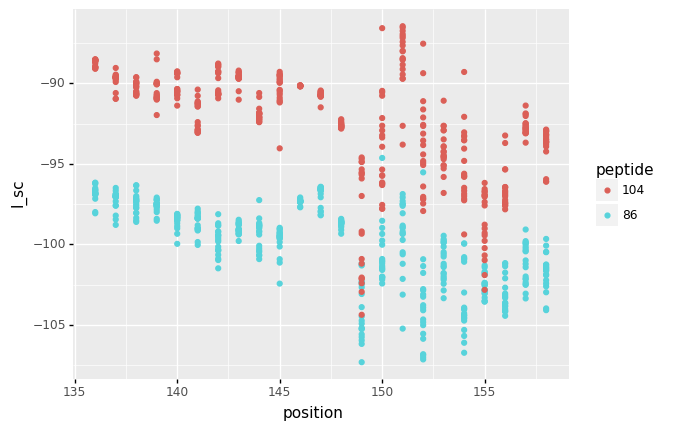

<ggplot: (8784796605510)>

In [3]:
(
    pn.ggplot(data, pn.aes('position', 'I_sc', color='peptide'))
    + pn.geom_point()
)

In [4]:
from itertools import combinations

mutations = list(set(data['mutcode']))
mut_pairs = combinations(mutations,2)

data104i = data104.set_index('mutcode')
data86i = data86.set_index('mutcode')

In [16]:
p104vs86 = data104i['I_sc'] / data86i['I_sc']
p86vs104 = data86i['I_sc'] / data104i['I_sc']

preferences = pd.DataFrame(p104vs86).rename(columns={'I_sc':'104/86'})
preferences['86/104'] = p86vs104

print("Preferred 86 position: ",preferences.iloc[np.argmax(preferences['86/104'])])
print("Preferred 104 position: ",preferences.iloc[np.argmax(preferences['104/86'])])

Preferred 86 position:  104/86    0.859887
86/104    1.162943
Name: 152ASN, dtype: float64
Preferred 104 position:  104/86    1.010217
86/104    0.989886
Name: 155ARG, dtype: float64


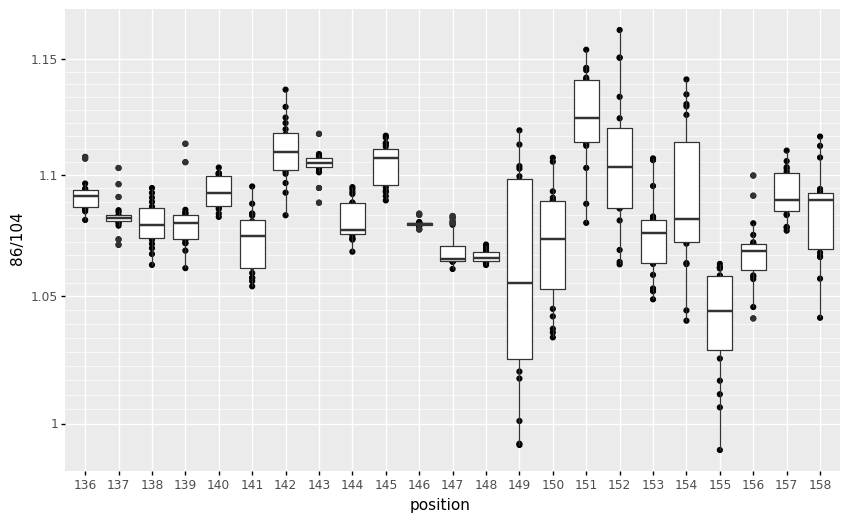

<ggplot: (8784777850724)>

In [17]:
preferences['position'] = [x[:-3] for x in preferences.index]

pn.options.figure_size = (10, 6)
(
    pn.ggplot(preferences, pn.aes('position', '86/104', logy=True))
    + pn.geom_point()
    + pn.geom_boxplot()
    + pn.scale_y_log10()
)

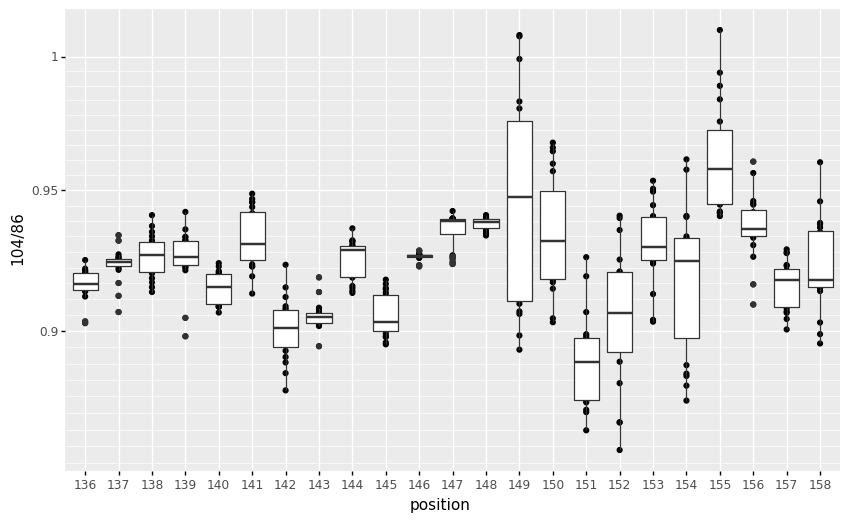

<ggplot: (8784777973053)>

In [18]:
(
    pn.ggplot(preferences, pn.aes('position', '104/86'))
    + pn.geom_point()
    + pn.geom_boxplot()
    + pn.scale_y_log10()
)

Looks like this is pretty similar to what we are seeing in the screen.

**Ideas:**
- should I try to simulate the screen results to see if that's what we are seeing?
- Is there a way to add 'WT' to the analysis above to allow us to look +/- 2 stdev?

In [19]:
def is_WT(mutcode):
    position = int(mutcode[:-3])-1 #must change to 0 indexing
    aa = mutcode[-3:]
    one_letter = AA_CODE[aa]
    if one_letter == LBIT_SEQUENCE[position]:
        return True
        #return 'positive'
    else:
        return False
        #return 'experimental'

preferences = preferences.reset_index()
preferences['condition'] = preferences['mutcode'].apply(is_WT)
preferences.sample(5)



,mutcode,104/86,86/104,position,condition
456,158THR,0.937749,1.066383,158,False
444,158CYS,0.915846,1.091887,158,False
252,148MET,0.939794,1.064063,148,False
402,156ASN,0.956300,1.045697,156,False
363,154ASP,0.929948,1.075329,154,False


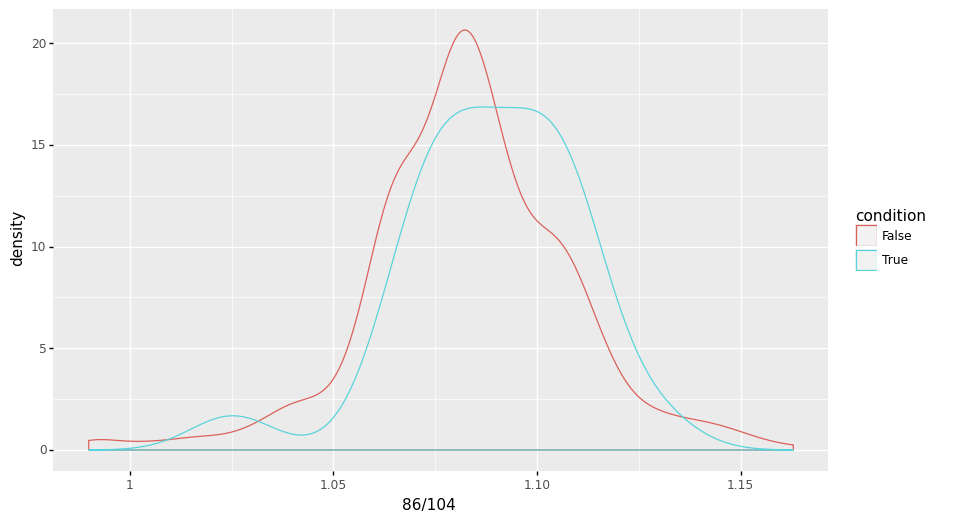

<ggplot: (8784777881058)>

In [20]:
(pn.ggplot(preferences, pn.aes('86/104', color='condition'))
+ pn.geom_density()
)